# Experiments

In [1]:
# (Optional) When developing locally, this reloads the module code when changes are made,
# making it easier to iterate.
%load_ext autoreload
%autoreload 2

In [1]:
%pip install datasets


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset

dataset = load_dataset("PatronusAI/financebench")

/Users/benjamin.chambers/Library/Caches/pypoetry/virtualenvs/knowledge-graph-bxUBmW8M-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# For development, we're only going to look at examples from this document.
# For full evaluation, we could consider all examples, grouped by document.
amd_2022_url = "https://ir.amd.com/sec-filings/content/0000002488-23-000047/0000002488-23-000047.pdf"

amd_2022_dataset = dataset.filter(lambda x: x["doc_link"] == amd_2022_url)

In [5]:
amd_2022_dataset["train"].to_pandas()

,financebench_id,doc_name,doc_link,doc_period,question_type,question,answer,evidence_text,page_number
0,financebench_id_00222,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,domain-relevant,Does AMD have a reasonably healthy liquidity p...,"Yes. The quick ratio is 1.57, calculated as (c...","Consolidated Balance Sheets\nDecember 31,\n202...",56
1,financebench_id_00995,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,domain-relevant,What are the major products and services that ...,AMD sells server microprocessors (CPUs) and gr...,Overview\nWe are a global semiconductor compan...,4
2,financebench_id_01198,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,domain-relevant,What drove revenue change as of the FY22 for AMD?,"In 2022, AMD reported Higher sales of their EP...","Net\nrevenue for 2022 was $23.6 billion, an in...",43
3,financebench_id_00917,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,domain-relevant,What drove operating margin change as of the F...,The decrease in AMD's operating income was pri...,Operating income for 2022 was $1.3 billion com...,43
4,financebench_id_01279,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,domain-relevant,"Among operations, investing, and financing act...","In 2022, AMD brought in the most cashflow from...","Advanced Micro Devices, Inc.\nConsolidated Sta...",58
5,financebench_id_00563,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,novel-generated,"From FY21 to FY22, excluding Embedded, in whic...",Data Center,"Year Ended\nDecember 31,\n2022\nDecember 25,\n...",48
6,financebench_id_00757,AMD_2022_10K,https://ir.amd.com/sec-filings/content/0000002...,2022,novel-generated,Did AMD report customer concentration in FY22?,"Yes, one customer accounted for 16% of consoli...",One customer accounted for 16% of our consolid...,12


# Download the PDF

In [5]:
%pip install "unstructured[pdf]"


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Download PDF from URL
import requests

with requests.get(amd_2022_url) as response:
    with open('amd_2022.pdf', 'wb') as f:
        f.write(response.content)

In [4]:
from langchain_community.document_loaders import UnstructuredPDFLoader
loader = UnstructuredPDFLoader('amd_2022.pdf', mode="elements")
elements = loader.load()
elements

[Document(page_content='Table of Contents', metadata={'source': 'amd_2022.pdf', 'coordinates': {'points': ((23.801670112263704, 24.727773736763424), (23.801670112263704, 31.930281052658984), (79.85673046881709, 31.930281052658984), (79.85673046881709, 24.727773736763424)), 'system': 'PixelSpace', 'layout_width': 612.0, 'layout_height': 792.0}, 'filename': 'amd_2022.pdf', 'languages': ['eng'], 'last_modified': '2024-05-03T07:57:27', 'page_number': 1, 'filetype': 'application/pdf', 'category': 'Header'}),
 Document(page_content='UNITED STATES SECURITIES AND EXCHANGE COMMISSION Washington, D.C. 20549', metadata={'source': 'amd_2022.pdf', 'coordinates': {'points': ((165.69481554129905, 46.84406654028055), (165.69481554129905, 65.71114815701571), (446.70045160191034, 65.71114815701571), (446.70045160191034, 46.84406654028055)), 'system': 'PixelSpace', 'layout_width': 612.0, 'layout_height': 792.0}, 'filename': 'amd_2022.pdf', 'languages': ['eng'], 'last_modified': '2024-05-03T07:57:27', 'pa

In [7]:
loader = UnstructuredPDFLoader('amd_2022.pdf')
document = loader.load()
document

[Document(page_content='Table of Contents\n\nUNITED STATES SECURITIES AND EXCHANGE COMMISSION Washington, D.C. 20549\n\nFORM 10-K\n\n(Mark One)\n\n☒\n\nANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934. For the fiscal year ended December 31, 2022\n\nOR\n\n☐\n\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934. For the transition period from to\n\nCommission File Number 001-07882\n\nADVANCED MICRO DEVICES, INC.\n\n(Exact name of registrant as specified in its charter)\n\nDelaware (State or other jurisdiction of incorporation or organization)\n\n94-1692300 (I.R.S. Employer Identification No.)\n\n2485 Augustine Drive Santa Clara, California 95054 (Address of principal executive offices) (408) 749-4000 (Registrant’s telephone number, including area code)\n\nSecurities registered pursuant to Section 12(b) of the Act:\n\n(Title of each class) Common Stock, $0.01 par value per share\n\n(Trading symbol) AMD\n\n(Name of e

# Baseline RAG

In [29]:
%pip install langchain-chroma langchainhub

  Using cached langchainhub-0.1.15-py3-none-any.whl.metadata (621 bytes)
Using cached langchainhub-0.1.15-py3-none-any.whl (4.6 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4-turbo")

In [30]:
from langchain import hub
from langchain_chroma import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores.utils import filter_complex_metadata

filtered_elements = filter_complex_metadata(elements)
vectorstore = Chroma.from_documents(documents=filtered_elements, embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [35]:
question = amd_2022_dataset["train"][0]["question"]
print(f"Question: {question}")

rag_chain.invoke(question)

Question: Does AMD have a reasonably healthy liquidity profile based on its quick ratio for FY22? If the quick ratio is not relevant to measure liquidity, please state that and explain why.


"I don't have the specific information on AMD's quick ratio for FY22 to determine its liquidity profile."

# Basic Graph RAG

In [14]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer(llm=llm)

# Note: This operates sequentially on chunks. It takes a long time.
graph_documents = llm_transformer.convert_to_graph_documents(document)

In [ ]:
from knowledge_graph.render import render_graph_documents
render_graph_documents(graph_documents)

# Graph RAG With Knowledge Schema

In [14]:
from knowledge_graph.schema_inference import KnowledgeSchemaInferer
from knowledge_graph.render import render_knowledge_schema

inferer = KnowledgeSchemaInferer(llm)

In [9]:
suggested_schemas = inferer.infer_schemas_from(elements)

In [22]:
for idx, schema in enumerate(suggested_schemas):
    print(f"Schema {idx}:\n{schema.to_yaml_str()}\n\n")

Schema 0:
nodes:
- description: Represents a generic document, such as a book, report, or article.
  type: document
- description: Represents a section or chapter within a document.
  type: section
- description: Represents a subsection within a section of a document.
  type: subsection
relationships:
- description: Indicates that a document contains one or more sections.
  edge_type: contains
  source_types:
  - document
  target_types:
  - section
- description: Indicates that a section contains one or more subsections.
  edge_type: contains
  source_types:
  - section
  target_types:
  - subsection



Schema 1:
nodes:
- description: A structured group or entity such as companies, institutions, or regulatory
    bodies.
  type: organization
- description: A physical place or geographic area.
  type: location
relationships:
- description: An organization is established or situated within a specific location.
  edge_type: located_in
  source_types:
  - organization
  target_types:
  - 

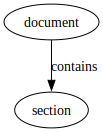

In [15]:
merged_schema = inferer.merge_schemas(suggested_schemas)
render_knowledge_schema(merged_schema)

In [21]:
print(merged_schema.to_yaml_str())

nodes:
- description: Represents a generic document, such as a book, report, or article.
  type: document
- description: Represents a section or chapter within a document.
  type: section
- description: Represents a subsection within a section of a document.
  type: subsection
relationships:
- description: Indicates that a document contains one or more sections.
  edge_type: contains
  source_types:
  - document
  target_types:
  - section
- description: Indicates that a section contains one or more subsections.
  edge_type: contains
  source_types:
  - section
  target_types:
  - subsection



In [ ]:
from knowledge_graph.extraction import KnowledgeSchema, NodeSchema, EdgeSchema, RelationshipSchema
knowledge_schema = KnowledgeSchema(
    nodes = [
        NodeSchema(type = "Organization",
                   description="A business that offers various products, plans, and services."),
        NodeSchema(type = "Service",
                   description="A service offered by an organization. Often part of a plan."),
        NodeSchema(type = "Plan",
                   description = "A plan offered by an organization."),
    ],
    edges = [
        EdgeSchema(type = "OFFERS",
                   description = "Connect an organization to a plan or service it offers.")
    ],
    relationships = [
        RelationshipSchema(
            edge_type = "OFFERS",
            source_type = "Organization",
            target_type = "Service",
            description = "The target service is offered by the source organization."
        ),
        RelationshipSchema(
            edge_type = "OFFERS",
            source_type = "Organization",
            target_type = "Plan",
            description = "The target plan is offered by the source organization."
        ),
    ]
)